In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
datadir = "data/NPInter_v4/"

In [272]:
dflnc = pd.read_csv(datadir+"lncRNA_interaction.txt",delimiter='\t')

In [173]:
dflnc.head()

interID ncName                ncID  ncType tarName      tarID  \
0  ncRI-40000001   4.5S  NONOTHNOBEDT000074  lncRNA    rpoD     P0A6M8   
1  ncRI-40000002     6S  NONOTHNOBEDT000078  lncRNA    rpoB     M1FYN7   
2  ncRI-40000003     6S  NONOTHNOBEDT000078  lncRNA    rpoD     P00579   
3  ncRI-40000004    7SK       NONHSAG040596  lncRNA     MYC  NM_002467   
4  ncRI-40000005    7SK       NONHSAG040596  lncRNA     ABO  NM_020469   

   tarType                                   interDescription  \
0  protein  Following translocation, 4.5S RNA replaces 23S...   
1  protein  UV crosslinking experiments revealed that 6S R...   
2  protein  The stable association of sigma70 with core en...   
3  protein  Electrophoretic mobility shift experiment indi...   
4  protein  Promoters pU6 and p7SK proved to express high ...   

                                          experiment                reference  \
0  Immunoprecipitation experiments;EMSA;SDS-polya...  8662727;8107852;1281314   
1                                      cross-linking                 10892648   
2                                      cross-linking                 10892648   
3                                               EMSA                  9018369   
4                                                  -                 22522162   

           organism tissueOrCell                                 tag  \
0  Escherichia coli            -               ncRNA-protein binding   
1  Escherichia coli            -               ncRNA-protein binding   
2  Escherichia coli            -               ncRNA-protein binding   
3      Homo sapiens            -  regulatory;promoter as action site   
4      Homo sapiens            -                          regulatory   

        class        level         datasource  
0     binding  RNA-Protein  Literature mining  
1     binding  RNA-Protein  Literature mining  
2     binding  RNA-Protein  Literature mining  
3  regulatory      RNA-RNA  Literature mining  
4  regulatory      RNA-RNA  Literature mining

In [174]:
len(dflnc)

658171

In [273]:
dflnc_hs = dflnc[dflnc.organism=="Homo sapiens"]
len(dflnc_hs)

531345

In [176]:
len(dflnc_hs.ncID.unique()) # 52k unique lncRNAs

51649

In [177]:
len(dflnc_hs.tarID.unique()) # 13k unique target proteins

13093

In [9]:
dfmir = pd.read_csv(datadir+"miRNA_interaction.txt",delimiter='\t')

In [10]:
dfmir_hs = dfmir_hs = dfmir[dfmir.organism=="Homo sapiens"]

In [11]:
print(len(dfmir_hs), len(dfmir_hs.ncID.unique()), len(dfmir_hs.tarID.unique()) ) # 11k unique miRNAs, 13k unique target proteins

450430 11277 12883


In [12]:
# Compare with HumanNet genes
dfhuman = pd.read_csv("data/HumanNet/Human_gene_mapping.csv")

In [13]:
dfhuman

EntrezID        SYMBOL
0              1          A1BG
1              2           A2M
2              9          NAT1
3             10          NAT2
4             12      SERPINA3
...          ...           ...
17844  102724652  LOC102724652
17845  105375355         UPK3B
17846  109703458          HTD2
17847  110599564     EEF1AKMT4
17848  118142757  LOC118142757

[17849 rows x 2 columns]

In [14]:
len(set(dfhuman.SYMBOL).intersection(set(dflnc_hs.ncID.unique())))

0

In [15]:
len(set(dfhuman.SYMBOL).intersection(set(dflnc_hs.tarID.unique()))) #ah??

1

In [16]:
set(dfhuman.SYMBOL).intersection(set(dflnc_hs.tarID.unique()))

{nan}

In [17]:
dflnc_hs.level.unique()

array(['RNA-RNA', 'RNA-Protein', 'DNA-TF', 'RNA-DNA', 'DNA-Protein',
       'DNA-DNA', '-', 'RNA-TF', 'lncRNA-TF'], dtype=object)

In [18]:
len(set(dfhuman.SYMBOL).intersection(set(dfmir_hs.tarID.unique()))) 

1

In [19]:
set(dfhuman.SYMBOL).intersection(set(dfmir_hs.tarID.unique()))

{nan}

In [20]:
dflnc_hs

interID             ncName             ncID  ncType  \
3       ncRI-40000004                7SK    NONHSAG040596  lncRNA   
4       ncRI-40000005                7SK    NONHSAG040596  lncRNA   
5       ncRI-40000006                7SK    NONHSAG040596  lncRNA   
6       ncRI-40000007                7SK    NONHSAG040596  lncRNA   
7       ncRI-40000008                7SK    NONHSAG040596  lncRNA   
...               ...                ...              ...     ...   
658166  ncRI-41100601              NEAT1  ENSG00000245532   ncRNA   
658167  ncRI-41100620              HUWE1  ENSG00000086758    mRNA   
658168  ncRI-41100641           SNRNP200  ENSG00000144028    mRNA   
658169  ncRI-41100648  ENSG00000227195.4                -    mRNA   
658170  ncRI-41100649                JUN  ENSG00000177606    mRNA   

                  tarName      tarID  tarType  \
3                     MYC  NM_002467  protein   
4                     ABO  NM_020469  protein   
5                  HEXIM1     O94992  protein   
6                    Oct1     P20263  protein   
7                     Tat     P17735  protein   
...                   ...        ...      ...   
658166          HY3_SCRNA          -   lncRNA   
658167  ENSG00000225091.1          -   lncRNA   
658168    ENSG00000234741          -   lncRNA   
658169                CGN          -   lncRNA   
658170  ENSG00000227195.4          -   lncRNA   

                                         interDescription  \
3       Electrophoretic mobility shift experiment indi...   
4       Promoters pU6 and p7SK proved to express high ...   
5       Binding of the 7SK snRNA turns the HEXIM1 prot...   
6       PTF and Oct-1 enhance transcription from the 7...   
7       Tat efficiently replaces HEXIM1 on the 7SK snR...   
...                                                   ...   
658166             RNA-RNA interaction from RISE database   
658167             RNA-RNA interaction from RISE database   
658168             RNA-RNA interaction from RISE database   
658169             RNA-RNA interaction from RISE database   
658170             RNA-RNA interaction from RISE database   

                                               experiment  \
3                                                    EMSA   
4                                                       -   
5       Yeast two-hybrid analysis;Immunofluorescence;M...   
6                                                       -   
7                                                       -   
...                                                   ...   
658166                                            LIGRseq   
658167                                            LIGRseq   
658168                                            LIGRseq   
658169                                            LIGRseq   
658170                                            LIGRseq   

                                                reference      organism  \
3                                                 9018369  Homo sapiens   
4                                                22522162  Homo sapiens   
5       15201869;15994294;17671421;20675720;20926576;1...  Homo sapiens   
6                                                 1535687  Homo sapiens   
7                                       20976203;20471949  Homo sapiens   
...                                                   ...           ...   
658166                                           27184080  Homo sapiens   
658167                                           27184080  Homo sapiens   
658168                                           27184080  Homo sapiens   
658169                                           27184080  Homo sapiens   
658170                                           27184080  Homo sapiens   

       tissueOrCell                                 tag       class  \
3                 -  regulatory;promoter as action site  regulatory   
4                 -                          regulatory  regulatory   
5               

In [21]:
4609 in list(dfhuman.EntrezID) #there are some overlaps with tarName. Again, the tarName conventions are all over the place

True

In [22]:
dfhuman[dfhuman.SYMBOL=='MYC']

EntrezID SYMBOL
2949      4609    MYC

In [23]:
len(set(dfhuman.SYMBOL).intersection(set(dflnc_hs.tarName.unique()))) #there are 6546 overlaps by SYMBOL. 

6546

In [24]:
tragetoverlapbyname = dflnc_hs[dflnc_hs.tarName.isin(set(dfhuman.SYMBOL).intersection(set(dflnc_hs.tarName.unique())))]
tragetoverlapbyname 

interID             ncName             ncID  ncType   tarName  \
3       ncRI-40000004                7SK    NONHSAG040596  lncRNA       MYC   
5       ncRI-40000006                7SK    NONHSAG040596  lncRNA    HEXIM1   
8       ncRI-40000009                7SK    NONHSAG040596  lncRNA      CDK9   
9       ncRI-40000010                7SK    NONHSAG040596  lncRNA    PPP1CA   
12      ncRI-40000013                7SK    NONHSAG040596  lncRNA     HMGA1   
...               ...                ...              ...     ...       ...   
658124  ncRI-41100250        LRRC75A-AS1  NONHSAG020957.2  lncRNA  CCNB1IP1   
658126  ncRI-41100252            RPLP0P2  NONHSAG008483.3  lncRNA     RPLP0   
658127  ncRI-41100266             MALAT1  ENSG00000278217    mRNA     IFFO1   
658134  ncRI-41100433               TERC  ENSG00000270141    mRNA  HSP90AB1   
658169  ncRI-41100648  ENSG00000227195.4                -    mRNA       CGN   

                  tarID  tarType  \
3             NM_002467  protein   
5                O94992  protein   
8                P50750  protein   
9                P62136  protein   
12               P17096  protein   
...                 ...      ...   
658124  ENSG00000100814     mRNA   
658126  ENSG00000089157     mRNA   
658127  ENSG00000010295   lncRNA   
658134  ENSG00000096384   lncRNA   
658169                -   lncRNA   

                                         interDescription  \
3       Electrophoretic mobility shift experiment indi...   
5       Binding of the 7SK snRNA turns the HEXIM1 prot...   
8       Northern hybridization was performed to confir...   
9       PP2B and PP1alpha cooperatively disrupt 7SK sn...   
12      We provide evidence for 7SK RNA complexes cont...   
...                                                   ...   
658124             RNA-RNA interaction from RISE database   
658126             RNA-RNA interaction from RISE database   
658127             RNA-RNA interaction from RISE database   
658134             RNA-RNA interaction from RISE database   
658169             RNA-RNA interaction from RISE database   

                                               experiment  \
3                                                    EMSA   
5       Yeast two-hybrid analysis;Immunofluorescence;M...   
8                                           Northern Blot   
9                                                       -   
12      Immunoprecipitation experiments;Mass spectrome...   
...                                                   ...   
658124                                             SPLASH   
658126                                             SPLASH   
658127                                            LIGRseq   
658134                                            LIGRseq   
658169                                            LIGRseq   

                                                reference      organism  \
3                                                 9018369  Homo sapiens   
5       15201869;15994294;17671421;20675720;20926576;1...  Homo sapiens   
8                                       21098020;11713532  Homo sapiens   
9                                                18483222  Homo sapiens   
12                             21957495;21282977;21087998  Homo sapiens   
...                                                   ...           ...   
658124                                           27184079  Homo sapiens   
658126                                           27184079  Homo sapiens   
658127                                           27184080  Homo sapiens   
658134                                           27184080  Homo sapiens   
658169                                           27184080  Homo sapiens   

       tissueOrCell                                 tag       class  \
3                 -  regulatory;promoter as action site  regulatory   
5                 -               ncRNA-protein binding     binding   
8                 -               ncRNA-protein bind

In [25]:
# Need to detect which conventions for tarName.
dfhuman[dfhuman.SYMBOL=='TAT'] #so, Tat in the row 7 exist.

EntrezID SYMBOL
4601      6898    TAT

In [26]:
dflnc_hs[dflnc_hs.tarName.str.contains("ENSG")] #Some names are in Ensemble ID but rare

interID    ncName             ncID ncType            tarName  \
658165  ncRI-41100600      GAS5  ENSG00000234741  ncRNA  ENSG00000225091.1   
658167  ncRI-41100620     HUWE1  ENSG00000086758   mRNA  ENSG00000225091.1   
658168  ncRI-41100641  SNRNP200  ENSG00000144028   mRNA    ENSG00000234741   
658170  ncRI-41100649       JUN  ENSG00000177606   mRNA  ENSG00000227195.4   

       tarID tarType                        interDescription experiment  \
658165     -  lncRNA  RNA-RNA interaction from RISE database    LIGRseq   
658167     -  lncRNA  RNA-RNA interaction from RISE database    LIGRseq   
658168     -  lncRNA  RNA-RNA interaction from RISE database    LIGRseq   
658170     -  lncRNA  RNA-RNA interaction from RISE database    LIGRseq   

       reference      organism tissueOrCell                  tag    class  \
658165  27184080  Homo sapiens      HEK293T  RNA-RNA interaction  binding   
658167  27184080  Homo sapiens      HEK293T  RNA-RNA interaction  binding   
658168  27184080  Homo sapiens      HEK293T  RNA-RNA interaction  binding   
658170  27184080  Homo sapiens      HEK293T  RNA-RNA interaction  binding   

          level     datasource  
658165  RNA-RNA  RISE database  
658167  RNA-RNA  RISE database  
658168  RNA-RNA  RISE database  
658170  RNA-RNA  RISE database

In [27]:
dflnc_hs[dflnc_hs.tarName.str.contains("ENST")]

Empty DataFrame
Columns: [interID, ncName, ncID, ncType, tarName, tarID, tarType, interDescription, experiment, reference, organism, tissueOrCell, tag, class, level, datasource]
Index: []

In [28]:
list(dflnc_hs.tarName)

['MYC',
 'ABO',
 'HEXIM1',
 'Oct1',
 'Tat',
 'CDK9',
 'PPP1CA',
 'PP2B',
 'hLARP7',
 'HMGA1',
 'MEPCE',
 'PTF',
 'SRRT',
 'MnSOD',
 'SRP19',
 'SRP54',
 'APOBEC3F',
 'BRF1',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'EWSR1',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'EWSR1',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'EWSR1',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'hsa-miR-106a-3p',
 'WIPF3',
 'PRR15',
 'EWSR1',
 'hsa-miR-106a-3p',
 'hsa-m

In [29]:
dflnc_hs[dflnc_hs.tarName.str.contains("hsa-miR-106a-3p")]

interID              ncName           ncID  ncType  \
22      ncRI-40000023  ABC12-49244600F4.3              -  lncRNA   
23      ncRI-40000024          ABHD11-AS2              -  lncRNA   
24      ncRI-40000025          AC000120.7  NONHSAG048195  lncRNA   
25      ncRI-40000026          AC000124.1  NONHSAG048720  lncRNA   
26      ncRI-40000027          AC002115.6              -  lncRNA   
...               ...                 ...            ...     ...   
355495  ncRI-40358990               ALG13  NONHSAG055112  lncRNA   
355496  ncRI-40358991                XIAP  NONHSAG055254  lncRNA   
355497  ncRI-40358992               RAP2C  NONHSAG055327  lncRNA   
355498  ncRI-40358993       NONHSAG055576  NONHSAG055576  lncRNA   
355499  ncRI-40358994               RPL10  NONHSAG055587  lncRNA   

                tarName      tarID tarType  \
22      hsa-miR-106a-3p  MI0000113   miRNA   
23      hsa-miR-106a-3p  MI0000113   miRNA   
24      hsa-miR-106a-3p  MI0000113   miRNA   
25      hsa-miR-106a-3p  MI0000113   miRNA   
26      hsa-miR-106a-3p  MI0000113   miRNA   
...                 ...        ...     ...   
355495  hsa-miR-106a-3p  MI0000113   miRNA   
355496  hsa-miR-106a-3p  MI0000113   miRNA   
355497  hsa-miR-106a-3p  MI0000113   miRNA   
355498  hsa-miR-106a-3p  MI0000113   miRNA   
355499  hsa-miR-106a-3p  MI0000113   miRNA   

                                         interDescription  \
22      mir-CLIp capture of a mirna targetome uncovers...   
23      mir-CLIp capture of a mirna targetome uncovers...   
24      mir-CLIp capture of a mirna targetome uncovers...   
25      mir-CLIp capture of a mirna targetome uncovers...   
26      mir-CLIp capture of a mirna targetome uncovers...   
...                                                   ...   
355495             interactions between ncRNAs and miRNAs   
355496             interactions between ncRNAs and miRNAs   
355497             interactions between ncRNAs and miRNAs   
355498             interactions between ncRNAs and miRNAs   
355499             interactions between ncRNAs and miRNAs   

                                               experiment reference  \
22                                                   CLIP  25531890   
23                                                   CLIP  25531890   
24                                                   CLIP  25531890   
25                                                   CLIP  25531890   
26                                                   CLIP  25531890   
...                                                   ...       ...   
355495  Conserved miRNAs target sites predicted by Tar...         -   
355496  Conserved miRNAs target sites predicted by Tar...         -   
355497  Conserved miRNAs target sites predicted by Tar...         -   
355498  Conserved miRNAs target sites predicted by Tar...         -   
355499  Conserved miRNAs target sites predicted by Tar...         -   

            organism tissueOrCell  \
22      Homo sapiens         HeLa   
23      Homo sapiens         HeLa   
24      Homo sapiens         HeLa   
25      Homo sapiens         HeLa   
26      Homo sapiens         HeLa   
...              ...          ...   
355495  Homo sapiens            -   
355496  Homo sapiens            -   
355497  Homo sapiens            -   
355498  Homo sapiens            -   
355499  Homo sapiens            -   

                                                 tag               class  \
22      miRNA target interaction;RNA-RNA interaction             binding   
23      miRNA target interaction;RNA-RNA interaction             binding   
24      miRNA target interaction;RNA-RNA interaction             binding   
25      miRNA target interaction;RNA-RNA interaction             binding   
26      miRNA target interaction;RNA-RNA interaction             binding   
...                                              ...                 ...   
355495     miRNA;miRNA target interaction;regulatory  binding;regulatory   
35549

In [30]:
dflnc_hs.tarType.unique()

array(['protein', 'miRNA', 'lncRNA', 'DNA', 'mRNA', 'Protein',
       'pseudogene', 'ncRNA', 'snoRNA', 'snRNA'], dtype=object)

In [31]:
dflnc_hs.groupby("tarType")["interID"].count()

tarType
DNA                3
Protein            1
lncRNA          7427
mRNA            7150
miRNA         120499
ncRNA            468
protein       395284
pseudogene       381
snRNA            119
snoRNA            13
Name: interID, dtype: int64

In [32]:
dflnc_hs[dflnc_hs.tarType=="lncRNA"]

interID             ncName             ncID  ncType  \
6676    ncRI-40006993           KCNQ1OT1    NONHSAG007431  lncRNA   
6752    ncRI-40007069             MALAT1    NONHSAG008675  lncRNA   
6753    ncRI-40007070          BC1 BC200                -  lncRNA   
6767    ncRI-40007084     antisense RNAs                -  lncRNA   
6793    ncRI-40007110               XIST    NONHSAG054780  lncRNA   
...               ...                ...              ...     ...   
658166  ncRI-41100601              NEAT1  ENSG00000245532   ncRNA   
658167  ncRI-41100620              HUWE1  ENSG00000086758    mRNA   
658168  ncRI-41100641           SNRNP200  ENSG00000144028    mRNA   
658169  ncRI-41100648  ENSG00000227195.4                -    mRNA   
658170  ncRI-41100649                JUN  ENSG00000177606    mRNA   

                      tarName          tarID tarType  \
6676                      h19  NONHSAG007409  lncRNA   
6752                 MIR155HG  NONHSAG032560  lncRNA   
6753                   BCYRN1  NONHSAT053546  lncRNA   
6767    antisense RNA of PU.1              -  lncRNA   
6793                     TSIX  NONHSAG054779  lncRNA   
...                       ...            ...     ...   
658166              HY3_SCRNA              -  lncRNA   
658167      ENSG00000225091.1              -  lncRNA   
658168        ENSG00000234741              -  lncRNA   
658169                    CGN              -  lncRNA   
658170      ENSG00000227195.4              -  lncRNA   

                                         interDescription  \
6676    We herein investigate?LIT1,?IGF2,?H19?and?CDKN...   
6752    Other examples of cancer-associated lncRNAs su...   
6753    BC200 RNA?and?BC1?are likely regulators of loc...   
6767    We show here that noncoding antisense RNAs are...   
6793    In addition, Xist and Tsix RNA form an RNA dup...   
...                                                   ...   
658166             RNA-RNA interaction from RISE database   
658167             RNA-RNA interaction from RISE database   
658168             RNA-RNA interaction from RISE database   
658169             RNA-RNA interaction from RISE database   
658170             RNA-RNA interaction from RISE database   

                                experiment  \
6676    qRT-PCR;ChIP;In situ Hybridization   
6752                                     -   
6753                                     -   
6767                      RNA interference   
6793                                     -   
...                                    ...   
658166                             LIGRseq   
658167                             LIGRseq   
658168                             LIGRseq   
658169                             LIGRseq   
658170                             LIGRseq   

                                  reference      organism  \
6676                               16965397  Homo sapiens   
6752                               21489289  Homo sapiens   
6753                               21969146  Homo sapiens   
6767                               18676813  Homo sapiens   
6793    18535243;19684108;15125641;19013827  Homo sapiens   
...                                     ...           ...   
658166                             27184080  Homo sapiens   
658167                             27184080  Homo sapiens   
658168                             27184080  Homo sapiens   
658169                             27184080  Homo sapiens   
658170                             27184080  Homo sapiens   

                  tissueOrCell                  tag    class    level  \
6676                Colorectal  RNA-RNA interaction  binding  RNA-RNA   
6752        liver cancer cells  RNA-RNA interaction  binding  RNA-RNA   
6753    central nervous system  RNA-RNA interaction  binding  RNA-RNA   
6767    U937;HL-60;Jurkat;JSL1  RNA-RNA interaction  binding  RNA-RNA   
6793                         -  RNA-RNA interaction  binding  RNA-RNA   
...                        ...                  ...    

In [33]:
dflnc_hs[dflnc_hs.ncType=="lncRNA"]

interID ncName             ncID  ncType       tarName  \
3       ncRI-40000004    7SK    NONHSAG040596  lncRNA           MYC   
4       ncRI-40000005    7SK    NONHSAG040596  lncRNA           ABO   
5       ncRI-40000006    7SK    NONHSAG040596  lncRNA        HEXIM1   
6       ncRI-40000007    7SK    NONHSAG040596  lncRNA          Oct1   
7       ncRI-40000008    7SK    NONHSAG040596  lncRNA           Tat   
...               ...    ...              ...     ...           ...   
658158  ncRI-41100583  TINCR  NONHSAG024566.2  lncRNA  LOC100131564   
658159  ncRI-41100584  TINCR  NONHSAG024566.2  lncRNA  LOC100170939   
658160  ncRI-41100585  TINCR  NONHSAG024566.2  lncRNA     LOC440354   
658161  ncRI-41100586  TINCR  NONHSAG024566.2  lncRNA     LOC728640   
658162  ncRI-41100587  TINCR  NONHSAG024566.2  lncRNA     LOC729737   

            tarID     tarType  \
3       NM_002467     protein   
4       NM_020469     protein   
5          O94992     protein   
6          P20263     protein   
7          P17735     protein   
...           ...         ...   
658158          -        mRNA   
658159          -        mRNA   
658160          -  pseudogene   
658161          -      lncRNA   
658162          -      lncRNA   

                                         interDescription  \
3       Electrophoretic mobility shift experiment indi...   
4       Promoters pU6 and p7SK proved to express high ...   
5       Binding of the 7SK snRNA turns the HEXIM1 prot...   
6       PTF and Oct-1 enhance transcription from the 7...   
7       Tat efficiently replaces HEXIM1 on the 7SK snR...   
...                                                   ...   
658158             RNA-RNA interaction from RISE database   
658159             RNA-RNA interaction from RISE database   
658160             RNA-RNA interaction from RISE database   
658161             RNA-RNA interaction from RISE database   
658162             RNA-RNA interaction from RISE database   

                                               experiment  \
3                                                    EMSA   
4                                                       -   
5       Yeast two-hybrid analysis;Immunofluorescence;M...   
6                                                       -   
7                                                       -   
...                                                   ...   
658158                                             RIAseq   
658159                                             RIAseq   
658160                                             RIAseq   
658161                                             RIAseq   
658162                                             RIAseq   

                                                reference      organism  \
3                                                 9018369  Homo sapiens   
4                                                22522162  Homo sapiens   
5       15201869;15994294;17671421;20675720;20926576;1...  Homo sapiens   
6                                                 1535687  Homo sapiens   
7                                       20976203;20471949  Homo sapiens   
...                                                   ...           ...   
658158                                           25259926  Homo sapiens   
658159                                           25259926  Homo sapiens   
658160                                           25259926  Homo sapiens   
658161                                           25259926  Homo sapiens   
658162                                           25259926  Homo sapiens   

         tissueOrCell                                 tag       class  \
3                   -  regulatory;promoter as action site  regulatory   
4                   -                          regulatory  regulatory   
5                   -               ncRNA-protein binding     binding   
6                   -                  ncRNA is regulated  regulatory   
7                   -           

In [34]:
len(dflnc_hs[dflnc_hs.ncType=="lncRNA"].ncID.unique())

46846

In [35]:
len(dflnc_hs[dflnc_hs.ncType=="lncRNA"].tarName.unique())

10196

In [36]:
list(dflnc_hs[dflnc_hs.ncType=="lncRNA"].tarName.unique())

['MYC',
 'ABO',
 'HEXIM1',
 'Oct1',
 'Tat',
 'CDK9',
 'PPP1CA',
 'PP2B',
 'hLARP7',
 'HMGA1',
 'MEPCE',
 'PTF',
 'SRRT',
 'MnSOD',
 'SRP19',
 'SRP54',
 'APOBEC3F',
 'BRF1',
 'hsa-miR-106a-3p',
 'EWSR1',
 'WIPF3',
 'PRR15',
 'RGPD4',
 'TNNT3',
 'KRTAP5-4',
 'INS',
 'hsa-miR-1293',
 'hsa-miR-3143',
 'hsa-miR-4775',
 'hsa-miR-5096',
 'hsa-miR-5189',
 'hsa-miR-3136-3p',
 'hsa-miR-4659a-3p',
 'hsa-miR-4659b-3p',
 'hsa-miR-4763-3p',
 'hsa-mir-421',
 'SERPINB8',
 'HK2',
 'POLE4',
 'ACTR1B',
 'SERPINE1',
 'FLJ21870',
 'TRMT2A',
 'SOX9',
 'RPS14',
 'PolII',
 'PRC2',
 'RASSF1A',
 'hsa-miR-1273a',
 'hsa-miR-3929',
 'hsa-miR-3689c',
 'hsa-miR-30b-3p',
 'hsa-miR-1285-5p',
 'hsa-miR-3613-3p',
 'hsa-miR-3689b-3p',
 'hsa-miR-3194-3p',
 'hsa-miR-1273g-3p',
 'hsa-miR-6511a-3p',
 'hsa-miR-6722-3p',
 'hsa-mir-3192',
 'GAT4',
 'pollII',
 'hsa-miR-485-3p',
 'BACE1',
 'APP',
 'IER5',
 'LRFN2',
 'ARC',
 'MAP1B',
 'CAMK2A',
 'SSB',
 'PABPC1',
 'SRP14',
 'SRP9',
 'FMR1',
 'PNUTS',
 'SNIP1',
 'hsa-mir-107',
 'hs

In [37]:
broken=['IFN-伪','HIF-1ä¼ª']
accession=["AAF22034.1"]
otherprotein=['SR protein family','SR140', 'Proteins of the Dros']
manualconv={"hsa-let-7i":{"Entrez":406891,"symbol":"MIRLET7I"}}

In [38]:
dflnc_hs[dflnc_hs.tarName=='SR140'] #Entrez GeneID:23350, HGNC:30855 DisGeNET:23350, GeneCards:U2SURP

interID  ncName                ncID  ncType tarName   tarID  \
1924  ncRI-40002218  MALAT1       NONHSAG008675  lncRNA   SR140  O15042   
5448  ncRI-40005765      U1       NONHSAG000498  lncRNA   SR140  O15042   
5853  ncRI-40006170      U2  NONHSANOBEDT000113  lncRNA   SR140  O15042   

      tarType                                   interDescription experiment  \
1924  protein  MALAT1 interacts with SR proteins and influenc...          -   
5448  protein  ChIRP-MS identi?es endogenous protein partners...   CHIRP-MS   
5853  protein  ChIRP-MS identi?es endogenous protein partners...   CHIRP-MS   

     reference      organism tissueOrCell                    tag    class  \
1924  20797886  Homo sapiens            -  ncRNA-protein binding  binding   
5448  25843628  Homo sapiens         HeLa  ncRNA-protein binding  binding   
5853  25843628  Homo sapiens         HeLa  ncRNA-protein binding  binding   

            level         datasource  
1924  RNA-Protein  Literature mining  
5448  RNA-Protein  Literature mining  
5853  RNA-Protein  Literature mining

In [39]:
406891 in list(dfhuman.EntrezID)

False

In [254]:
def treat_dash(x1,x2):
    """
    decide what to do with dash
    original string is x1-x2 format
    assume x2[0] is a number
    if x1[-1] is character, remove dash and concat x1 and x2
    if x1[-1] is numeric, leave the dash
    """
    assert type(x1)==str, "x1 not a string"
    assert type(x2)==str, "x2 not a string"    
    l1=np.char.isnumeric(list(x1))
    l2=np.char.isnumeric(list(x2))
    assert l2[0]==True, "x2 not number"
    if l1[-1]==True:
        return x1+'-'+x2
    else:
        return x1+x2
    
    
def convert_hsa(name):
    """
    convert hsa-mir to gene symbol
    """
#     return name
    x = name.lower()
    if '/' in x:
        return '/' # name #skip processing. there are more than one name    
    else:
        if x[:8]=='hsa-mir-':
            x = x[8:]
            if x[-3:] in ['-3p','-5p']:
                x = x[:-3]
            slist = str(x).split('-')
            cnt = len(slist)
            if cnt==1:
                return "MIR"+slist[0]
            else:
                return "MIR"+treat_dash(slist[0],slist[1])
        else:
            return name


In [41]:
len(dflnc_hs[dflnc_hs.tarName.str.contains('hsa-')].tarName.unique())

1059

In [42]:
len(dflnc_hs[dflnc_hs.tarName.str.contains('hsa-')])

120171

In [115]:
x = 'a1234'

np.char.isnumeric(list(x))

array([False,  True,  True,  True,  True])

In [43]:
hsanames = dflnc_hs[dflnc_hs.tarName.str.contains('hsa-')].tarName.unique()

In [79]:
convert_hsa(hsanames[1])

1

In [94]:
termcnt=[]
expt = []
for hsa in hsanames:
    c = convert_hsa(hsa)
    if type(c)==int:
        termcnt.append(c)
    else:
        expt.append(c)

In [93]:
from collections import Counter
Counter(termcnt)b#1043 conforms to the predictable format and 16 exceptions with hsa name header.

Counter({1: 1010, 2: 33})

In [95]:
len(expt)

16

In [96]:
expt

['hsa-mir-15a/15b/16/1',
 'hsa-mir-17/20b/93/51',
 'hsa-mir-20a/106b',
 'hsa-mir-193a-3p/193b',
 'hsa-let-7f-5p',
 'hsa-mir-30a/30b/30c/',
 'hsa-let-7i-5p',
 'hsa-mir-19a/19b',
 'hsa-let-7b-5p',
 'hsa-let-7a-2',
 'hsa-let-7c',
 'hsa-let-7d-3p',
 'hsa-let-7e-3p',
 'hsa-let-7g-5p',
 'hsa-mir-181a/181b/18',
 'hsa-mir-27a/27b']

In [274]:
dflnc_hs['tarName_clean'] = dflnc_hs['tarName'].apply(lambda x: convert_hsa(x))

/tmp/ipykernel_3435/4110591514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflnc_hs['tarName_clean'] = dflnc_hs['tarName'].apply(lambda x: convert_hsa(x))


In [166]:
dflnc_hs['tarName_clean'] 

3                       MYC
4                       ABO
5                    HEXIM1
6                      Oct1
7                       Tat
                ...        
658166            HY3_SCRNA
658167    ENSG00000225091.1
658168      ENSG00000234741
658169                  CGN
658170    ENSG00000227195.4
Name: tarName_clean, Length: 531345, dtype: object

In [181]:
dflnc_hs[dflnc_hs['tarName_clean'].str.contains('MIR')]

interID              ncName             ncID      ncType  \
22      ncRI-40000023  ABC12-49244600F4.3                -      lncRNA   
23      ncRI-40000024          ABHD11-AS2                -      lncRNA   
24      ncRI-40000025          AC000120.7    NONHSAG048195      lncRNA   
25      ncRI-40000026          AC000124.1    NONHSAG048720      lncRNA   
26      ncRI-40000027          AC002115.6                -      lncRNA   
...               ...                 ...              ...         ...   
653682  ncRI-41030361         CTD-2503O16  ENSG00000196390  pseudogene   
653840  ncRI-41030681               USP37  ENSG00000135913        mRNA   
653877  ncRI-41030753             TRAV8-5  ENSG00000256379        mRNA   
654322  ncRI-41031554              MT-CO3  ENSG00000198938        mRNA   
654833  ncRI-41032411              ARID5B  ENSG00000150347        mRNA   

                tarName            tarID tarType  \
22      hsa-miR-106a-3p        MI0000113   miRNA   
23      hsa-miR-106a-3p        MI0000113   miRNA   
24      hsa-miR-106a-3p        MI0000113   miRNA   
25      hsa-miR-106a-3p        MI0000113   miRNA   
26      hsa-miR-106a-3p        MI0000113   miRNA   
...                 ...              ...     ...   
653682        MIR2052HG  NONHSAG098913.1  lncRNA   
653840        MIR3179-1  NONHSAG018685.2  lncRNA   
653877        MIR3180-4  NONHSAG018699.2  lncRNA   
654322         MIR222HG  NONHSAG104186.2  lncRNA   
654833         MIR137HG  NONHSAG059277.2  lncRNA   

                                         interDescription experiment  \
22      mir-CLIp capture of a mirna targetome uncovers...       CLIP   
23      mir-CLIp capture of a mirna targetome uncovers...       CLIP   
24      mir-CLIp capture of a mirna targetome uncovers...       CLIP   
25      mir-CLIp capture of a mirna targetome uncovers...       CLIP   
26      mir-CLIp capture of a mirna targetome uncovers...       CLIP   
...                                                   ...        ...   
653682             RNA-RNA interaction from RISE database      PARIS   
653840             RNA-RNA interaction from RISE database      PARIS   
653877             RNA-RNA interaction from RISE database      PARIS   
654322             RNA-RNA interaction from RISE database      PARIS   
654833             RNA-RNA interaction from RISE database      PARIS   

       reference      organism tissueOrCell  \
22      25531890  Homo sapiens         HeLa   
23      25531890  Homo sapiens         HeLa   
24      25531890  Homo sapiens         HeLa   
25      25531890  Homo sapiens         HeLa   
26      25531890  Homo sapiens         HeLa   
...          ...           ...          ...   
653682  27180905  Homo sapiens         HeLa   
653840  27180905  Homo sapiens         HeLa   
653877  27180905  Homo sapiens         HeLa   
654322  27180905  Homo sapiens         HeLa   
654833  27180905  Homo sapiens         HeLa   

                                                 tag    class    level  \
22      miRNA target interaction;RNA-RNA interaction  binding  RNA-RNA   
23      miRNA target interaction;RNA-RNA interaction  binding  RNA-RNA   
24      miRNA target interaction;RNA-RNA interaction  binding  RNA-RNA   
25      miRNA target interaction;RNA-RNA interaction  binding  RNA-RNA   
26      miRNA target interaction;RNA-RNA interaction  binding  RNA-RNA   
...                                              ...      ...      ...   
653682                           RNA-RNA interaction  binding  RNA-RNA   
653840                           RNA-RNA interaction  binding  RNA-RNA   
653877                           RNA-RNA interaction  binding  RNA-RNA   
654322                           RNA-RNA interaction  binding  RNA-RNA   
654833                           RNA-RNA interaction  binding  RNA-RNA   

               datasource tarName_clean  
22      Literature mining       MIR106a  
23      Literature mining       MIR106a  
24      Literature mining       MIR106a  
25      Liter

In [256]:
len(dflnc_hs[dflnc_hs['tarName_clean']=='/'].index)

4077

In [183]:
dflnc_hs.loc[460]

interID                                            ncRI-40000462
ncName                                                    BCYRN1
ncID                                               NONHSAG027692
ncType                                                    lncRNA
tarName                                     hsa-mir-15a/15b/16/1
tarID                                                  MI0000069
tarType                                                    miRNA
interDescription                       collections from lncRNome
experiment                                                  CLIP
reference                                               23846593
organism                                            Homo sapiens
tissueOrCell                                                   -
tag                 miRNA target interaction;RNA-RNA interaction
class                                                 regulatory
level                                                    RNA-RNA
datasource               

In [275]:
import time
def splitrows(df,ridx):
    """
    given the list of row index ridx split them according to the tarName (multiple entries with /). copy the row data
    """
    dfn = copy.deepcopy(df)
    n=len(ridx)
    print(n,'indices')
    i=0
    rows2add=[]
    t0=time.time()
    for idx in ridx:
        if i%100==0:
            t1=time.time()
            print('-------  ', i,'/',n, '  -------', t1-t0)
        row = copy.deepcopy(dfn.loc[idx])
        x = row.tarName
        prefix = x[:8]
        if prefix=='hsa-mir-':         
            x = x[8:]
            subs = x.split('/')         
            if len(subs)>1:
                dfn.drop(idx,axis=0,inplace=True)
                for s in subs:
                    rown = copy.deepcopy(row)
                    new_tarName = prefix+s
                    rown.tarName=new_tarName
                    rows2add.append(rown)
                
        i+=1  
    df2add = pd.DataFrame(rows2add, columns=dfn.columns)
    dfn = pd.concat([dfn,df2add],axis=0, ignore_index=True)
    print(time.time()-t0)
    return dfn

In [276]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

dflnc_hs = splitrows(dflnc_hs,list(dflnc_hs[dflnc_hs['tarName_clean']=='/'].index))

4077 indices
-------   0 / 4077   ------- 2.6226043701171875e-06
-------   100 / 4077   ------- 15.379374265670776
-------   200 / 4077   ------- 31.07928967475891
-------   300 / 4077   ------- 46.80697512626648
-------   400 / 4077   ------- 62.533066272735596
-------   500 / 4077   ------- 78.23411583900452
-------   600 / 4077   ------- 93.95635390281677
-------   700 / 4077   ------- 109.66537237167358
-------   800 / 4077   ------- 125.37281608581543
-------   900 / 4077   ------- 141.09496140480042
-------   1000 / 4077   ------- 156.82586121559143
-------   1100 / 4077   ------- 172.5165593624115
-------   1200 / 4077   ------- 188.25064373016357
-------   1300 / 4077   ------- 203.97247171401978
-------   1400 / 4077   ------- 219.6714768409729
-------   1500 / 4077   ------- 235.3976321220398
-------   1600 / 4077   ------- 251.10894179344177
-------   1700 / 4077   ------- 266.81160044670105
-------   1800 / 4077   ------- 282.5369987487793
-------   1900 / 4077   ------- 29

In [277]:
dflnc_hs

interID ncName             ncID  ncType      tarName      tarID  \
0       ncRI-40000004    7SK    NONHSAG040596  lncRNA          MYC  NM_002467   
1       ncRI-40000005    7SK    NONHSAG040596  lncRNA          ABO  NM_020469   
2       ncRI-40000006    7SK    NONHSAG040596  lncRNA       HEXIM1     O94992   
3       ncRI-40000007    7SK    NONHSAG040596  lncRNA         Oct1     P20263   
4       ncRI-40000008    7SK    NONHSAG040596  lncRNA          Tat     P17735   
...               ...    ...              ...     ...          ...        ...   
539048  ncRI-40970252   HULC    NONHSAG042970  lncRNA  hsa-mir-15b  MI0000069   
539049  ncRI-40970252   HULC    NONHSAG042970  lncRNA   hsa-mir-16  MI0000069   
539050  ncRI-40970252   HULC    NONHSAG042970  lncRNA    hsa-mir-1  MI0000069   
539051  ncRI-40970422  DLEU1  ENSG00000176124  lncRNA  hsa-mir-19a  MI0000073   
539052  ncRI-40970422  DLEU1  ENSG00000176124  lncRNA  hsa-mir-19b  MI0000073   

        tarType                                   interDescription  \
0       protein  Electrophoretic mobility shift experiment indi...   
1       protein  Promoters pU6 and p7SK proved to express high ...   
2       protein  Binding of the 7SK snRNA turns the HEXIM1 prot...   
3       protein  PTF and Oct-1 enhance transcription from the 7...   
4       protein  Tat efficiently replaces HEXIM1 on the 7SK snR...   
...         ...                                                ...   
539048    miRNA  HULC inhibits the expression and mature of miR15a   
539049    miRNA  HULC inhibits the expression and mature of miR15a   
539050    miRNA  HULC inhibits the expression and mature of miR15a   
539051    miRNA  miR-19a might be co-expressed with lncRNA-DLEU...   
539052    miRNA  miR-19a might be co-expressed with lncRNA-DLEU...   

                                               experiment  \
0                                                    EMSA   
1                                                       -   
2       Yeast two-hybrid analysis;Immunofluorescence;M...   
3                                                       -   
4                                                       -   
...                                                   ...   
539048  Chromatin immunoprecipitation (CHIP) assay;RNA...   
539049  Chromatin immunoprecipitation (CHIP) assay;RNA...   
539050  Chromatin immunoprecipitation (CHIP) assay;RNA...   
539051                               statistical analysis   
539052                               statistical analysis   

                                                reference      organism  \
0                                                 9018369  Homo sapiens   
1                                                22522162  Homo sapiens   
2       15201869;15994294;17671421;20675720;20926576;1...  Homo sapiens   
3                                                 1535687  Homo sapiens   
4                                       20976203;20471949  Homo sapiens   
...                                                   ...           ...   
539048                                           29895332  Homo sapiens   
539049                                           29895332  Homo sapiens   
539050                                           29895332  Homo sapiens   
539051                                           26416600  Homo sapiens   
539052                                           26416600  Homo sapiens   

       tissueOrCell                                     tag  \
0                 -      regulatory;promoter as action site   
1                 -                              regulatory   
2                 -                   ncRNA-protein binding   
3                 -                      ncRNA is regulated   
4                 -                   ncRNA-protein binding   
...             ...                                     ...   
539048        Hep3B  ncRNA is regulated;RNA-RNA interaction   
539049        Hep3B  ncRNA is regulated;RNA-RNA interaction   

In [279]:
dflnc_hs['tarName_clean'] = dflnc_hs['tarName'].apply(lambda x: convert_hsa(x))

In [280]:
dflnc_hs

interID ncName             ncID  ncType      tarName      tarID  \
0       ncRI-40000004    7SK    NONHSAG040596  lncRNA          MYC  NM_002467   
1       ncRI-40000005    7SK    NONHSAG040596  lncRNA          ABO  NM_020469   
2       ncRI-40000006    7SK    NONHSAG040596  lncRNA       HEXIM1     O94992   
3       ncRI-40000007    7SK    NONHSAG040596  lncRNA         Oct1     P20263   
4       ncRI-40000008    7SK    NONHSAG040596  lncRNA          Tat     P17735   
...               ...    ...              ...     ...          ...        ...   
539048  ncRI-40970252   HULC    NONHSAG042970  lncRNA  hsa-mir-15b  MI0000069   
539049  ncRI-40970252   HULC    NONHSAG042970  lncRNA   hsa-mir-16  MI0000069   
539050  ncRI-40970252   HULC    NONHSAG042970  lncRNA    hsa-mir-1  MI0000069   
539051  ncRI-40970422  DLEU1  ENSG00000176124  lncRNA  hsa-mir-19a  MI0000073   
539052  ncRI-40970422  DLEU1  ENSG00000176124  lncRNA  hsa-mir-19b  MI0000073   

        tarType                                   interDescription  \
0       protein  Electrophoretic mobility shift experiment indi...   
1       protein  Promoters pU6 and p7SK proved to express high ...   
2       protein  Binding of the 7SK snRNA turns the HEXIM1 prot...   
3       protein  PTF and Oct-1 enhance transcription from the 7...   
4       protein  Tat efficiently replaces HEXIM1 on the 7SK snR...   
...         ...                                                ...   
539048    miRNA  HULC inhibits the expression and mature of miR15a   
539049    miRNA  HULC inhibits the expression and mature of miR15a   
539050    miRNA  HULC inhibits the expression and mature of miR15a   
539051    miRNA  miR-19a might be co-expressed with lncRNA-DLEU...   
539052    miRNA  miR-19a might be co-expressed with lncRNA-DLEU...   

                                               experiment  \
0                                                    EMSA   
1                                                       -   
2       Yeast two-hybrid analysis;Immunofluorescence;M...   
3                                                       -   
4                                                       -   
...                                                   ...   
539048  Chromatin immunoprecipitation (CHIP) assay;RNA...   
539049  Chromatin immunoprecipitation (CHIP) assay;RNA...   
539050  Chromatin immunoprecipitation (CHIP) assay;RNA...   
539051                               statistical analysis   
539052                               statistical analysis   

                                                reference      organism  \
0                                                 9018369  Homo sapiens   
1                                                22522162  Homo sapiens   
2       15201869;15994294;17671421;20675720;20926576;1...  Homo sapiens   
3                                                 1535687  Homo sapiens   
4                                       20976203;20471949  Homo sapiens   
...                                                   ...           ...   
539048                                           29895332  Homo sapiens   
539049                                           29895332  Homo sapiens   
539050                                           29895332  Homo sapiens   
539051                                           26416600  Homo sapiens   
539052                                           26416600  Homo sapiens   

       tissueOrCell                                     tag  \
0                 -      regulatory;promoter as action site   
1                 -                              regulatory   
2                 -                   ncRNA-protein binding   
3                 -                      ncRNA is regulated   
4                 -                   ncRNA-protein binding   
...             ...                                     ...   
539048        Hep3B  ncRNA is regulated;RNA-RNA interaction   
539049        Hep3B  ncRNA is regulated;RNA-RNA interaction   

In [281]:
len(set(dfhuman.SYMBOL).intersection(set(dflnc_hs.tarName_clean.unique())))

6546

In [284]:
dfhuman[dfhuman.SYMBOL.astype(str).str.contains("MIR")] #no MIR

Empty DataFrame
Columns: [EntrezID, SYMBOL]
Index: []

In [287]:
overlap_tar = set(dfhuman.SYMBOL).intersection(set(dflnc_hs.tarName_clean.unique()))

In [286]:
len(set(dfhuman.SYMBOL).intersection(set(dflnc_hs.ncName.unique()))) #nice

9856

In [288]:
overlap_nc = set(dfhuman.SYMBOL).intersection(set(dflnc_hs.ncName.unique()))

In [289]:
len(overlap_tar.intersection(overlap_nc))

4500

In [346]:
print(len(overlap_tar), len(overlap_nc))

6546 9856


In [290]:
len(overlap_tar.union(overlap_nc))

11902

In [291]:
dflnc_hs['nc_HN'] = dflnc_hs.ncName.isin(dfhuman.SYMBOL)

In [294]:
dflnc_hs.nc_HN.sum()

133675

In [295]:
dflnc_hs['tar_HN'] = dflnc_hs.tarName_clean.isin(dfhuman.SYMBOL)

In [296]:
dflnc_hs.tar_HN.sum()

294411

In [298]:
dflncHN = dflnc_hs[(dflnc_hs.nc_HN)|(dflnc_hs.tar_HN)]
dflncHN

interID  ncName             ncID  ncType       tarName  \
0       ncRI-40000004     7SK    NONHSAG040596  lncRNA           MYC   
2       ncRI-40000006     7SK    NONHSAG040596  lncRNA        HEXIM1   
5       ncRI-40000009     7SK    NONHSAG040596  lncRNA          CDK9   
6       ncRI-40000010     7SK    NONHSAG040596  lncRNA        PPP1CA   
9       ncRI-40000013     7SK    NONHSAG040596  lncRNA         HMGA1   
...               ...     ...              ...     ...           ...   
539036  ncRI-40970055  FBXL14  ENSG00000171823  lncRNA   hsa-mir-20b   
539037  ncRI-40970055  FBXL14  ENSG00000171823  lncRNA    hsa-mir-93   
539038  ncRI-40970055  FBXL14  ENSG00000171823  lncRNA    hsa-mir-51   
539039  ncRI-40970056  FBXL14  ENSG00000171823  lncRNA   hsa-mir-20a   
539040  ncRI-40970056  FBXL14  ENSG00000171823  lncRNA  hsa-mir-106b   

            tarID  tarType                                   interDescription  \
0       NM_002467  protein  Electrophoretic mobility shift experiment indi...   
2          O94992  protein  Binding of the 7SK snRNA turns the HEXIM1 prot...   
5          P50750  protein  Northern hybridization was performed to confir...   
6          P62136  protein  PP2B and PP1alpha cooperatively disrupt 7SK sn...   
9          P17096  protein  We provide evidence for 7SK RNA complexes cont...   
...           ...      ...                                                ...   
539036  MI0000071    miRNA  miR-17 and miR-20a targeting FBXL14 plays a ro...   
539037  MI0000071    miRNA  miR-17 and miR-20a targeting FBXL14 plays a ro...   
539038  MI0000071    miRNA  miR-17 and miR-20a targeting FBXL14 plays a ro...   
539039  MI0000076    miRNA  miR-17 and miR-20a targeting FBXL14 plays a ro...   
539040  MI0000076    miRNA  miR-17 and miR-20a targeting FBXL14 plays a ro...   

                                               experiment  \
0                                                    EMSA   
2       Yeast two-hybrid analysis;Immunofluorescence;M...   
5                                           Northern Blot   
6                                                       -   
9       Immunoprecipitation experiments;Mass spectrome...   
...                                                   ...   
539036                          luciferase reporter assay   
539037                          luciferase reporter assay   
539038                          luciferase reporter assay   
539039                          luciferase reporter assay   
539040                          luciferase reporter assay   

                                                reference      organism  \
0                                                 9018369  Homo sapiens   
2       15201869;15994294;17671421;20675720;20926576;1...  Homo sapiens   
5                                       21098020;11713532  Homo sapiens   
6                                                18483222  Homo sapiens   
9                              21957495;21282977;21087998  Homo sapiens   
...                                                   ...           ...   
539036                                           29973690  Homo sapiens   
539037                                           29973690  Homo sapiens   
539038                                           29973690  Homo sapiens   
539039                                           29973690  Homo sapiens   
539040                                           29973690  Homo sapiens   

       tissueOrCell                                 tag       class  \
0                 -  regulatory;promoter as action site  regulatory   
2                 -               ncRNA-protein binding     binding   
5                 -               ncRNA-protein binding     binding   
6                 -                          regulatory  regulatory   
9                 -               ncRNA-protein binding     binding   
...             ...                                 ...         ...   
539036      HEK293T                 RNA-RNA i

In [299]:
len(dflncHN[dflncHN.nc_HN&dflncHN.tar_HN]) #51 edges to add as edge? (or does HN already capture?)

50808

In [302]:
dflncHN[dflncHN.nc_HN&dflncHN.tar_HN].level.unique()

array(['RNA-Protein', 'RNA-RNA'], dtype=object)

In [303]:
dflncHN.level.unique()

array(['RNA-RNA', 'RNA-Protein', 'DNA-TF', 'RNA-DNA', 'DNA-DNA', '-',
       'lncRNA-TF'], dtype=object)

In [304]:
dflncHN[['ncName','tarName_clean']].to_csv('data/NPInter_v4/processed/dflncHNtu.csv')

In [305]:
dflncHN.loc[40]

interID                                                 ncRI-40000045
ncName                                                          ABCD4
ncID                                                    NONHSAG015454
ncType                                                         lncRNA
tarName                                               hsa-miR-106a-3p
tarID                                                       MI0000113
tarType                                                         miRNA
interDescription    mir-CLIp capture of a mirna targetome uncovers...
experiment                                                       CLIP
reference                                                    25531890
organism                                                 Homo sapiens
tissueOrCell                                                     HeLa
tag                      miRNA target interaction;RNA-RNA interaction
class                                                         binding
level               

In [317]:
mapping = pd.read_csv('data/NPInter_v4/processed/dflncHN_mapping.csv')
mapping.drop("Unnamed: 0",axis=1,inplace=True)
mapping

X  ncName tarName_clean  ncEntrez  tarEntrez
0            0     7SK           MYC       NaN     4609.0
1            2     7SK        HEXIM1       NaN    10614.0
2            5     7SK          CDK9       NaN     1025.0
3            6     7SK        PPP1CA       NaN     5499.0
4            9     7SK         HMGA1       NaN     3159.0
...        ...     ...           ...       ...        ...
377273  539036  FBXL14        MIR20b  144699.0        NaN
377274  539037  FBXL14         MIR93  144699.0   407050.0
377275  539038  FBXL14         MIR51  144699.0        NaN
377276  539039  FBXL14        MIR20a  144699.0        NaN
377277  539040  FBXL14       MIR106b  144699.0        NaN

[377278 rows x 5 columns]

In [326]:
mapping = mapping.set_index('X')
mapping.index.name = None
mapping

ncName tarName_clean  ncEntrez  tarEntrez
0          7SK           MYC       NaN     4609.0
2          7SK        HEXIM1       NaN    10614.0
5          7SK          CDK9       NaN     1025.0
6          7SK        PPP1CA       NaN     5499.0
9          7SK         HMGA1       NaN     3159.0
...        ...           ...       ...        ...
539036  FBXL14        MIR20b  144699.0        NaN
539037  FBXL14         MIR93  144699.0   407050.0
539038  FBXL14         MIR51  144699.0        NaN
539039  FBXL14        MIR20a  144699.0        NaN
539040  FBXL14       MIR106b  144699.0        NaN

[377278 rows x 4 columns]

In [327]:
dflncHN['ncEntrez'] = mapping['ncEntrez']
dflncHN['tarEntrez'] = mapping['tarEntrez']

/tmp/ipykernel_3435/933838379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflncHN['ncEntrez'] = mapping['ncEntrez']
/tmp/ipykernel_3435/933838379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflncHN['tarEntrez'] = mapping['tarEntrez']


In [341]:
dflncHN.ncEntrez = dflncHN.ncEntrez.apply(lambda x: int(x) if not np.isnan(x) else 0)
dflncHN.tarEntrez = dflncHN.tarEntrez.apply(lambda x: int(x) if not np.isnan(x) else 0)

/tmp/ipykernel_3435/20858598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflncHN.ncEntrez = dflncHN.ncEntrez.apply(lambda x: int(x) if not np.isnan(x) else 0)
/tmp/ipykernel_3435/20858598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflncHN.tarEntrez = dflncHN.tarEntrez.apply(lambda x: int(x) if not np.isnan(x) else 0)


In [342]:
dflncHN #0 entrez id means the gene is not in the ncbi database

interID  ncName             ncID  ncType       tarName  \
0       ncRI-40000004     7SK    NONHSAG040596  lncRNA           MYC   
2       ncRI-40000006     7SK    NONHSAG040596  lncRNA        HEXIM1   
5       ncRI-40000009     7SK    NONHSAG040596  lncRNA          CDK9   
6       ncRI-40000010     7SK    NONHSAG040596  lncRNA        PPP1CA   
9       ncRI-40000013     7SK    NONHSAG040596  lncRNA         HMGA1   
...               ...     ...              ...     ...           ...   
539036  ncRI-40970055  FBXL14  ENSG00000171823  lncRNA   hsa-mir-20b   
539037  ncRI-40970055  FBXL14  ENSG00000171823  lncRNA    hsa-mir-93   
539038  ncRI-40970055  FBXL14  ENSG00000171823  lncRNA    hsa-mir-51   
539039  ncRI-40970056  FBXL14  ENSG00000171823  lncRNA   hsa-mir-20a   
539040  ncRI-40970056  FBXL14  ENSG00000171823  lncRNA  hsa-mir-106b   

            tarID  tarType                                   interDescription  \
0       NM_002467  protein  Electrophoretic mobility shift experiment indi...   
2          O94992  protein  Binding of the 7SK snRNA turns the HEXIM1 prot...   
5          P50750  protein  Northern hybridization was performed to confir...   
6          P62136  protein  PP2B and PP1alpha cooperatively disrupt 7SK sn...   
9          P17096  protein  We provide evidence for 7SK RNA complexes cont...   
...           ...      ...                                                ...   
539036  MI0000071    miRNA  miR-17 and miR-20a targeting FBXL14 plays a ro...   
539037  MI0000071    miRNA  miR-17 and miR-20a targeting FBXL14 plays a ro...   
539038  MI0000071    miRNA  miR-17 and miR-20a targeting FBXL14 plays a ro...   
539039  MI0000076    miRNA  miR-17 and miR-20a targeting FBXL14 plays a ro...   
539040  MI0000076    miRNA  miR-17 and miR-20a targeting FBXL14 plays a ro...   

                                               experiment  \
0                                                    EMSA   
2       Yeast two-hybrid analysis;Immunofluorescence;M...   
5                                           Northern Blot   
6                                                       -   
9       Immunoprecipitation experiments;Mass spectrome...   
...                                                   ...   
539036                          luciferase reporter assay   
539037                          luciferase reporter assay   
539038                          luciferase reporter assay   
539039                          luciferase reporter assay   
539040                          luciferase reporter assay   

                                                reference  ... tissueOrCell  \
0                                                 9018369  ...            -   
2       15201869;15994294;17671421;20675720;20926576;1...  ...            -   
5                                       21098020;11713532  ...            -   
6                                                18483222  ...            -   
9                              21957495;21282977;21087998  ...            -   
...                                                   ...  ...          ...   
539036                                           29973690  ...      HEK293T   
539037                                           29973690  ...      HEK293T   
539038                                           29973690  ...      HEK293T   
539039                                           29973690  ...      HEK293T   
539040                                           29973690  ...      HEK293T   

                                       tag       class        level  \
0       regulatory;promoter as action site  regulatory      RNA-RNA   
2                    ncRNA-protein binding     binding  RNA-Protein   
5                    ncRNA-protein binding     binding  RNA-Protein   
6                               regulatory  regulatory  RNA-Protein   
9                    ncRNA-protein binding     binding  RNA-Protein   
...                                    ...         ...          ... 

In [344]:
len(set(dfhuman.EntrezID).intersection(set(dflncHN.tarEntrez.unique()))) #matches with symbol comparison

6545

In [345]:
len(set(dfhuman.EntrezID).intersection(set(dflncHN.ncEntrez.unique()))) #matches with symbol comparison

9855

In [361]:
# It seems there are all of protein, lncRNA and miRNA types in PPI
sub_nc = dflncHN[['ncEntrez','ncName','ncType','nc_HN']].rename(columns={'ncEntrez':'EntrezID','ncName':'symbol','ncType':"geneType","nc_HN":"HN"})
sub_tar = dflncHN[['tarEntrez','tarName_clean','tarType','tar_HN']].rename(columns={'tarEntrez':'EntrezID','tarName_clean':'symbol','tarType':"geneType","tar_HN":"HN"})
sub = pd.concat([sub_nc,sub_tar],axis=0,ignore_index=True)

In [362]:
sub

EntrezID   symbol geneType     HN
0              0      7SK   lncRNA  False
1              0      7SK   lncRNA  False
2              0      7SK   lncRNA  False
3              0      7SK   lncRNA  False
4              0      7SK   lncRNA  False
...          ...      ...      ...    ...
754551         0   MIR20b    miRNA  False
754552    407050    MIR93    miRNA  False
754553         0    MIR51    miRNA  False
754554         0   MIR20a    miRNA  False
754555         0  MIR106b    miRNA  False

[754556 rows x 4 columns]

In [364]:
subuni = sub.drop_duplicates()
subuni

EntrezID      symbol geneType     HN
0              0         7SK   lncRNA  False
7              0         7SL   lncRNA  False
11          5826       ABCD4   lncRNA   True
12             0  AC005586.2   lncRNA  False
13             0  AC005688.1   lncRNA  False
...          ...         ...      ...    ...
751069         0      MIR20a    miRNA  False
751403         0      MIR27a    miRNA  False
751609         0      MIR30a    miRNA  False
751611         0      MIR30c    miRNA  False
751612         0         MIR    miRNA  False

[50063 rows x 4 columns]

In [365]:
subuni[subuni.EntrezID==0] #not in NCBI (no Entrez), therefore not in HN

EntrezID      symbol geneType     HN
0              0         7SK   lncRNA  False
7              0         7SL   lncRNA  False
12             0  AC005586.2   lncRNA  False
13             0  AC005688.1   lncRNA  False
14             0  AC006427.1   lncRNA  False
...          ...         ...      ...    ...
751069         0      MIR20a    miRNA  False
751403         0      MIR27a    miRNA  False
751609         0      MIR30a    miRNA  False
751611         0      MIR30c    miRNA  False
751612         0         MIR    miRNA  False

[28145 rows x 4 columns]

In [366]:
subuni[subuni.EntrezID!=0]

EntrezID    symbol geneType     HN
11           5826     ABCD4   lncRNA   True
19         134510    UBLCP1   lncRNA   True
56      100379571  BACE1-AS   lncRNA  False
68         400500     BCAR4   lncRNA  False
70            618    BCYRN1   lncRNA  False
...           ...       ...      ...    ...
748631       6175     RPLP0     mRNA   True
748632      25900     IFFO1   lncRNA   True
748635       3326  HSP90AB1   lncRNA   True
748638      57530       CGN   lncRNA   True
749540     406952     MIR17    miRNA  False

[21918 rows x 4 columns]

In [367]:
subuni[(subuni.EntrezID!=0)&(subuni.HN)] #within HN (how can it be larger than HN?)

EntrezID    symbol geneType    HN
11          5826     ABCD4   lncRNA  True
19        134510    UBLCP1   lncRNA  True
95          8928     FOXH1   lncRNA  True
139         8629       JRK   lncRNA  True
141       197335     WDR90   lncRNA  True
...          ...       ...      ...   ...
748629     57820  CCNB1IP1     mRNA  True
748631      6175     RPLP0     mRNA  True
748632     25900     IFFO1   lncRNA  True
748635      3326  HSP90AB1   lncRNA  True
748638     57530       CGN   lncRNA  True

[17878 rows x 4 columns]

In [368]:
len(dfhuman)

17849

In [370]:
len(subuni[(subuni.EntrezID!=0)&(subuni.HN)].EntrezID.unique())

11902

In [371]:
len(subuni[(subuni.EntrezID!=0)&(subuni.HN)].symbol.unique())

11902

In [372]:
subuni[(subuni.EntrezID!=0)&(subuni.HN)].geneType.unique()

array(['lncRNA', 'protein', 'mRNA', 'ncRNA', 'pseudogene', 'Protein'],
      dtype=object)

In [373]:
subuni[subuni.geneType=='Protein']

EntrezID symbol geneType    HN
738324      5728   PTEN  Protein  True

In [374]:
subunihn = subuni[(subuni.EntrezID!=0)&(subuni.HN)]

In [375]:
subunihn.groupby('EntrezID').count()

symbol  geneType  HN
EntrezID                       
2               2         2   2
9               1         1   1
12              2         2   2
13              1         1   1
18              1         1   1
...           ...       ...  ..
100652748       1         1   1
100652824       1         1   1
101059918       1         1   1
101060200       1         1   1
101060321       1         1   1

[11902 rows x 3 columns]

In [376]:
subcnt = subunihn.groupby('EntrezID').count()
subcnt[subcnt.symbol>1]

symbol  geneType  HN
EntrezID                       
2               2         2   2
12              2         2   2
20              2         2   2
22              2         2   2
23              2         2   2
...           ...       ...  ..
100129654       2         2   2
100132247       2         2   2
100289635       2         2   2
100506736       2         2   2
100507290       2         2   2

[5127 rows x 3 columns]

In [379]:
dups = list(subcnt[subcnt.symbol>1].index)

In [383]:
subunihn[subunihn.EntrezID.isin(dups)].sort_values("EntrezID") #ther are 5k gene entities which types are multiple (hence not accurate)

EntrezID    symbol geneType    HN
743750          2       A2M     mRNA  True
1918            2       A2M   lncRNA  True
747649         12  SERPINA3     mRNA  True
45308          12  SERPINA3   lncRNA  True
393379         20     ABCA2  protein  True
...           ...       ...      ...   ...
740668  100289635    ZNF605     mRNA  True
743431  100506736   SLFN12L     mRNA  True
45961   100506736   SLFN12L   lncRNA  True
396064  100507290    ZNF865  protein  True
365164  100507290    ZNF865     mRNA  True

[11103 rows x 4 columns]

In [384]:
subunihn.geneType.unique()

array(['lncRNA', 'protein', 'mRNA', 'ncRNA', 'pseudogene', 'Protein'],
      dtype=object)

In [386]:
subunihn[subunihn.EntrezID.isin(dups)].sort_values("EntrezID").groupby('geneType').count()

EntrezID  symbol    HN
geneType                        
Protein          1       1     1
lncRNA        4701    4701  4701
mRNA          4270    4270  4270
ncRNA            3       3     3
protein       2128    2128  2128

In [385]:
subunihn[subunihn.EntrezID.isin(dups)].sort_values("EntrezID")[['EntrezID','symbol']].drop_duplicates()
#there are 5127 unique genes that overlap with HN PPI

EntrezID    symbol
743750          2       A2M
747649         12  SERPINA3
393379         20     ABCA2
738415         22     ABCB7
738636         23     ABCF1
...           ...       ...
47268   100129654     TCF24
20384   100132247    NPIPB5
50147   100289635    ZNF605
743431  100506736   SLFN12L
396064  100507290    ZNF865

[5127 rows x 2 columns]

In [387]:
subunihn[subunihn.EntrezID==20]

EntrezID symbol geneType    HN
1960          20  ABCA2   lncRNA  True
393379        20  ABCA2  protein  True

In [390]:
uni = list(subcnt[subcnt.symbol==1].index)

In [391]:
subunihn[subunihn.EntrezID.isin(uni)].sort_values("EntrezID")

EntrezID    symbol geneType    HN
370560          9      NAT1     mRNA  True
741209         13     AADAC     mRNA  True
1955           18      ABAT   lncRNA  True
744172         19     ABCA1     mRNA  True
1962           21     ABCA3   lncRNA  True
...           ...       ...      ...   ...
368654  100652748   TIMM23B     mRNA  True
367287  100652824  KIAA2012     mRNA  True
746620  101059918   GOLGA8R     mRNA  True
745534  101060200    ZNF891     mRNA  True
129002  101060321   TBC1D3G   lncRNA  True

[6775 rows x 4 columns]

In [392]:
subunihn[subunihn.EntrezID.isin(uni)].sort_values("EntrezID").geneType.unique()

array(['mRNA', 'lncRNA', 'protein', 'ncRNA', 'pseudogene'], dtype=object)

In [393]:
subunihn[subunihn.EntrezID.isin(uni)].sort_values("EntrezID").groupby("geneType").count()

EntrezID  symbol    HN
geneType                          
lncRNA          3913    3913  3913
mRNA            2228    2228  2228
ncRNA              1       1     1
protein          632     632   632
pseudogene         1       1     1

In [395]:
len(subunihn[subunihn.geneType.isin(["lncRNA",'ncRNA','mRNA'])].EntrezID.unique()) #11k noncoding RNAs within humannet PPI

11269

In [400]:
dflncHN[(dflncHN['nc_HN'].astype(int)+dflncHN['tar_HN'].astype(int))==1]

interID  ncName             ncID  ncType       tarName  \
0       ncRI-40000004     7SK    NONHSAG040596  lncRNA           MYC   
2       ncRI-40000006     7SK    NONHSAG040596  lncRNA        HEXIM1   
5       ncRI-40000009     7SK    NONHSAG040596  lncRNA          CDK9   
6       ncRI-40000010     7SK    NONHSAG040596  lncRNA        PPP1CA   
9       ncRI-40000013     7SK    NONHSAG040596  lncRNA         HMGA1   
...               ...     ...              ...     ...           ...   
539036  ncRI-40970055  FBXL14  ENSG00000171823  lncRNA   hsa-mir-20b   
539037  ncRI-40970055  FBXL14  ENSG00000171823  lncRNA    hsa-mir-93   
539038  ncRI-40970055  FBXL14  ENSG00000171823  lncRNA    hsa-mir-51   
539039  ncRI-40970056  FBXL14  ENSG00000171823  lncRNA   hsa-mir-20a   
539040  ncRI-40970056  FBXL14  ENSG00000171823  lncRNA  hsa-mir-106b   

            tarID  tarType                                   interDescription  \
0       NM_002467  protein  Electrophoretic mobility shift experiment indi...   
2          O94992  protein  Binding of the 7SK snRNA turns the HEXIM1 prot...   
5          P50750  protein  Northern hybridization was performed to confir...   
6          P62136  protein  PP2B and PP1alpha cooperatively disrupt 7SK sn...   
9          P17096  protein  We provide evidence for 7SK RNA complexes cont...   
...           ...      ...                                                ...   
539036  MI0000071    miRNA  miR-17 and miR-20a targeting FBXL14 plays a ro...   
539037  MI0000071    miRNA  miR-17 and miR-20a targeting FBXL14 plays a ro...   
539038  MI0000071    miRNA  miR-17 and miR-20a targeting FBXL14 plays a ro...   
539039  MI0000076    miRNA  miR-17 and miR-20a targeting FBXL14 plays a ro...   
539040  MI0000076    miRNA  miR-17 and miR-20a targeting FBXL14 plays a ro...   

                                               experiment  \
0                                                    EMSA   
2       Yeast two-hybrid analysis;Immunofluorescence;M...   
5                                           Northern Blot   
6                                                       -   
9       Immunoprecipitation experiments;Mass spectrome...   
...                                                   ...   
539036                          luciferase reporter assay   
539037                          luciferase reporter assay   
539038                          luciferase reporter assay   
539039                          luciferase reporter assay   
539040                          luciferase reporter assay   

                                                reference  ... tissueOrCell  \
0                                                 9018369  ...            -   
2       15201869;15994294;17671421;20675720;20926576;1...  ...            -   
5                                       21098020;11713532  ...            -   
6                                                18483222  ...            -   
9                              21957495;21282977;21087998  ...            -   
...                                                   ...  ...          ...   
539036                                           29973690  ...      HEK293T   
539037                                           29973690  ...      HEK293T   
539038                                           29973690  ...      HEK293T   
539039                                           29973690  ...      HEK293T   
539040                                           29973690  ...      HEK293T   

                                       tag       class        level  \
0       regulatory;promoter as action site  regulatory      RNA-RNA   
2                    ncRNA-protein binding     binding  RNA-Protein   
5                    ncRNA-protein binding     binding  RNA-Protein   
6                               regulatory  regulatory  RNA-Protein   
9                    ncRNA-protein binding     binding  RNA-Protein   
...                                    ...         ...          ... 

In [444]:
RHedges = dflncHN[(dflncHN['nc_HN'].astype(int)+dflncHN['tar_HN'].astype(int))==1]
len(RHedges)

326470

In [403]:
len(set(RHedges.ncEntrez.unique()).union(set(RHedges.tarEntrez.unique()))-set(dfhuman.EntrezID))
#number of unique R type nodes that are not in HN

4033

In [404]:
len(set(RHedges.ncEntrez.unique()).union(set(RHedges.tarEntrez.unique())).intersection(set(dfhuman.EntrezID)))
#number of unique H type nodes that are in HN

11519

In [405]:
#check overlaps with disgenet id and R id 
#check overlaps with disgenet id and H id 
ovary = pd.read_csv("data/DisGeNet/ovarian_cancer.csv")

In [407]:
set(ovary.EntrezID)

0        94025
1          898
2          595
3          268
4         5290
         ...  
3183      8013
3184    115701
3185      2047
3186     23461
3187       867
Name: EntrezID, Length: 3188, dtype: int64

In [416]:
Rnodes = set(RHedges.ncEntrez.unique()).union(set(RHedges.tarEntrez.unique()))-set(dfhuman.EntrezID)
Hnodes = set(RHedges.ncEntrez.unique()).union(set(RHedges.tarEntrez.unique())).intersection(set(dfhuman.EntrezID))
HNnodes = set(dfhuman.EntrezID)

In [418]:
print(len(set(ovary.EntrezID).intersection(Rnodes)))
print(len(set(ovary.EntrezID).intersection(Hnodes)))
print(len(set(ovary.EntrezID).intersection(HNnodes)))
print(len(set(ovary.EntrezID)))
print(len(Rnodes),len(Hnodes),len(HNnodes), len(HNnodes-Rnodes.union(Hnodes)))

201
1915
2702
3188
4033 11519 17849 6330


In [413]:
len(Rnodes.union(Hnodes))

15552

In [414]:
17849-11519

6330

In [514]:
ovarygenes = set(list(ovary.EntrezID))

In [515]:
print(len(ovarygenes-Rnodes), len(ovarygenes.intersection(Rnodes)))
print(len(ovarygenes-Hnodes), len(ovarygenes.intersection(Hnodes)))
print(len(ovarygenes-Rnodes.union(Hnodes)), len(ovarygenes.intersection(Rnodes.union(Hnodes))))
print(len(ovarygenes-HNnodes), len(ovarygenes.intersection(HNnodes)))

2987 201
1273 1915
1072 2116
486 2702


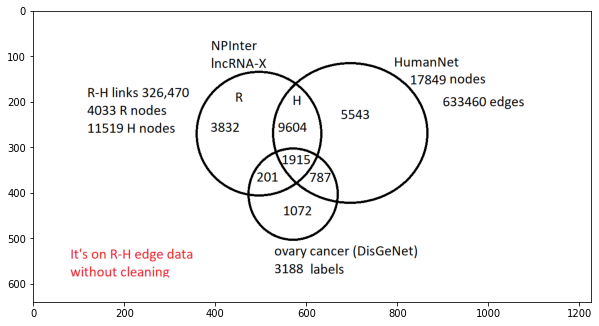

In [559]:
im = plt.imread("imgs/gene_overlaps_ovary_not_cleaned.png");
plt.figure(figsize=(10,10))
plt.imshow(im); 
# There might be duplicate entries in the edges of R-H links, 
# also there are huge amount of genes uncategorized (entrez id=0), so the unique entrezid count is meaningless.
# we could still remove entrezid=0.

In [455]:
RHedges[(RHedges.tar_HN==True)&(RHedges.ncEntrez!=0)]

interID    ncName             ncID  ncType   tarName  \
296     ncRI-40000340  BACE1-AS    NONHSAG009728  lncRNA     BACE1   
297     ncRI-40000341  BACE1-AS    NONHSAG009728  lncRNA       APP   
310     ncRI-40000388     BCAR4    NONHSAG018621  lncRNA     EWSR1   
312     ncRI-40000390     BCAR4    NONHSAG018621  lncRNA     SNIP1   
513     ncRI-40000595    BCYRN1    NONHSAG027692  lncRNA    EIF4A1   
...               ...       ...              ...     ...       ...   
527221  ncRI-41100243   RPS18P9                -  lncRNA     RPL12   
527222  ncRI-41100244   RPS18P9                -  lncRNA     RPL13   
527227  ncRI-41100252   RPLP0P2  NONHSAG008483.3  lncRNA     RPLP0   
527228  ncRI-41100266    MALAT1  ENSG00000278217    mRNA     IFFO1   
527235  ncRI-41100433      TERC  ENSG00000270141    mRNA  HSP90AB1   

                  tarID  tarType  \
296        NM_001207049  protein   
297              H7C0V9  protein   
310              Q01844  protein   
312              Q8TAD8  protein   
513              P60842  protein   
...                 ...      ...   
527221  ENSG00000197958     mRNA   
527222  ENSG00000167526     mRNA   
527227  ENSG00000089157     mRNA   
527228  ENSG00000010295   lncRNA   
527235  ENSG00000096384   lncRNA   

                                         interDescription  \
296     We report here that BACE1-antisense prevents m...   
297     BACE1-AS is directly implicated in the increas...   
310     CLIP Identifies EWS Binding Sites in a Variety...   
312        SNIP1 and PNUTS bind distinct regions of BCAR4   
513     Inhibits translation. Binds PABP, SRP9/14 hete...   
...                                                   ...   
527221             RNA-RNA interaction from RISE database   
527222             RNA-RNA interaction from RISE database   
527227             RNA-RNA interaction from RISE database   
527228             RNA-RNA interaction from RISE database   
527235             RNA-RNA interaction from RISE database   

                                               experiment  \
296                                                RT-PCR   
297                                                     -   
310                                                  CLIP   
312     RNA pull-down assays;Mass spectrometry;Immunop...   
513                                                     -   
...                                                   ...   
527221                                             SPLASH   
527222                                             SPLASH   
527227                                             SPLASH   
527228                                            LIGRseq   
527235                                            LIGRseq   

                                  reference  ...    tissueOrCell  \
296     21785702;18587408;20507594;20236612  ...               -   
297                                18587408  ...               -   
310                                24813895  ...            HeLa   
312                                25416949  ...   Breast tissue   
513                                18316401  ...               -   
...                                     ...  ...             ...   
527221                             27184079  ...  Lymphoblastoid   
527222                             27184079  ...  Lymphoblastoid   
527227                             27184079  ...              ES   
527228                             27184080  ...         HEK293T   
527235                             27184080  ...         HEK293T   

                           tag                   class        level  \
296     expression correlation  expression correlation      RNA-RNA   
297                 regulatory              regulatory  RNA-Protein   
310      ncRNA-protein binding                 binding  RNA-Protein   
312      ncRNA-protein binding                 binding  RNA-Protein   
513      ncRNA-protein binding                 binding  RNA-Protein   
...                        ... 

In [457]:
RHedges[(RHedges.nc_HN==True)&(RHedges.tarEntrez!=0)]

interID   ncName             ncID  ncType     tarName  \
138364  ncRI-40164485   CAMTA1    NONHSAG000256  lncRNA       ZFP36   
138366  ncRI-40164487     SDHB    NONHSAG000508  lncRNA       ZFP36   
138369  ncRI-40164490   SRSF10    NONHSAG000681  lncRNA       ZFP36   
138371  ncRI-40164492  TMEM50A    NONHSAG000729  lncRNA       ZFP36   
138372  ncRI-40164493    STMN1    NONHSAG000747  lncRNA       ZFP36   
...               ...      ...              ...     ...         ...   
536411  ncRI-40368502    RAP2C    NONHSAG055327  lncRNA  hsa-mir-93   
536417  ncRI-40368504    RPL10    NONHSAG055587  lncRNA  hsa-mir-17   
536419  ncRI-40368504    RPL10    NONHSAG055587  lncRNA  hsa-mir-93   
539035  ncRI-40970055   FBXL14  ENSG00000171823  lncRNA  hsa-mir-17   
539037  ncRI-40970055   FBXL14  ENSG00000171823  lncRNA  hsa-mir-93   

            tarID  tarType                                   interDescription  \
138364     M0QY76  protein  Global Target mRNA Specification and Regulatio...   
138366     M0QY76  protein  Global Target mRNA Specification and Regulatio...   
138369     M0QY76  protein  Global Target mRNA Specification and Regulatio...   
138371     M0QY76  protein  Global Target mRNA Specification and Regulatio...   
138372     M0QY76  protein  Global Target mRNA Specification and Regulatio...   
...           ...      ...                                                ...   
536411  MI0000071    miRNA             interactions between ncRNAs and miRNAs   
536417  MI0000071    miRNA             interactions between ncRNAs and miRNAs   
536419  MI0000071    miRNA             interactions between ncRNAs and miRNAs   
539035  MI0000071    miRNA  miR-17 and miR-20a targeting FBXL14 plays a ro...   
539037  MI0000071    miRNA  miR-17 and miR-20a targeting FBXL14 plays a ro...   

                                               experiment reference  ...  \
138364                                           PAR-CLIP  24401661  ...   
138366                                           PAR-CLIP  24401661  ...   
138369                                           PAR-CLIP  24401661  ...   
138371                                           PAR-CLIP  24401661  ...   
138372                                           PAR-CLIP  24401661  ...   
...                                                   ...       ...  ...   
536411  Conserved miRNAs target sites predicted by Tar...         -  ...   
536417  Conserved miRNAs target sites predicted by Tar...         -  ...   
536419  Conserved miRNAs target sites predicted by Tar...         -  ...   
539035                          luciferase reporter assay  29973690  ...   
539037                          luciferase reporter assay  29973690  ...   

       tissueOrCell                                        tag  \
138364       HEK293                      ncRNA-protein binding   
138366       HEK293                      ncRNA-protein binding   
138369       HEK293                      ncRNA-protein binding   
138371       HEK293                      ncRNA-protein binding   
138372       HEK293                      ncRNA-protein binding   
...             ...                                        ...   
536411            -  miRNA;miRNA target interaction;regulatory   
536417            -  miRNA;miRNA target interaction;regulatory   
536419            -  miRNA;miRNA target interaction;regulatory   
539035      HEK293T                        RNA-RNA interaction   
539037      HEK293T                        RNA-RNA interaction   

                     class        level                     datasource  \
138364             binding  RNA-Protein           High-throughput data   
138366             binding  RNA-Protein           High-throughput data   
138369             binding  RNA-Protein           High-throughput data   
138371             binding  RNA-Protein           High-throughput data   
138372             binding  RNA-Protein           High-throughput data   
...                    ...          ..

In [461]:
print(len(RHedges[(RHedges.nc_HN==True)&(RHedges.tar_HN==False)&(RHedges.tarEntrez!=0)]))
print(len(RHedges[(RHedges.nc_HN==False)&(RHedges.tar_HN==True)&(RHedges.ncEntrez!=0)]))

34159
41681


In [464]:
RHNZ = RHedges[(RHedges.ncEntrez!=0)&(RHedges.tarEntrez!=0)]
len(RHNZ)

75840

In [466]:
print(len(RHNZ.ncEntrez.unique()),len(RHNZ.tarEntrez.unique()),len(set(list(RHNZ.ncEntrez)+list(RHedges.tarEntrez))))

8094 4951 12572


In [470]:
RHNZsh = RHNZ[['ncEntrez','tarEntrez','nc_HN','tar_HN']].drop_duplicates()
RHNZsh

ncEntrez  tarEntrez  nc_HN  tar_HN
296     100379571      23621  False    True
297     100379571        351  False    True
310        400500       2130  False    True
312        400500      79753  False    True
513           618       1973  False    True
...           ...        ...    ...     ...
536405        331     406952   True   False
536409      57826     406952   True   False
536417       6134     406952   True   False
539035     144699     406952   True   False
539037     144699     407050   True   False

[75391 rows x 4 columns]

In [474]:
RHNZshfp = pd.concat([RHNZsh[RHNZsh.tar_HN][['ncEntrez','tarEntrez']].rename(columns={'ncEntrez':'ncEz','tarEntrez':'tarEz'}), RHNZsh[RHNZsh.nc_HN][['tarEntrez','ncEntrez']].rename(columns={'ncEntrez':'tarEz','tarEntrez':'ncEz'})])

    

In [477]:
RHclean = RHNZshfp.drop_duplicates() #now, tarEz are the genes that are in humannet, ncEz are genes that are not in HN but interact with genes in HN
RHclean

ncEz   tarEz
296     100379571   23621
297     100379571     351
310        400500    2130
312        400500   79753
513           618    1973
...           ...     ...
536405     406952     331
536409     406952   57826
536417     406952    6134
539035     406952  144699
539037     407050  144699

[75365 rows x 2 columns]

In [500]:
HN = set(list(dfhuman.EntrezID)) 
R = set(list(RHclean.ncEz))
H = set(list(RHclean.tarEz))
print(len(R), len(H), len(R.intersection(HN)),len(H.intersection(HN)))

4031 7136 0 7135


In [503]:
H-HN #????


{7795}

In [504]:
RHNZsh[(RHNZsh.ncEntrez==7795)|(RHNZsh.tarEntrez==7795)]

ncEntrez  tarEntrez  nc_HN  tar_HN
138986      7795       7538   True   False

In [505]:
print(7795 in HN, 7538 in HN)

False False


In [506]:
7795 in dfhuman.EntrezID #need to be careful, 7795 might not be the data element

True

In [510]:
RHclean.loc[138986]

ncEz     7538
tarEz    7795
Name: 138986, dtype: int64

In [511]:
RHclean = RHclean.drop(138986, axis=0)

In [513]:
HN = set(list(dfhuman.EntrezID)) 
R = set(list(RHclean.ncEz))
H = set(list(RHclean.tarEz))
print(len(R), len(H), len(R.intersection(HN)),len(H.intersection(HN))) #good.

4031 7135 0 7135


In [516]:
RH = R.union(H)
print(len(ovarygenes-R), len(ovarygenes.intersection(R)))
print(len(ovarygenes-H), len(ovarygenes.intersection(H)))
print(len(ovarygenes-RH), len(ovarygenes.intersection(RH)))
print(len(ovarygenes-HN), len(ovarygenes.intersection(HN)))

2987 201
1922 1266
1721 1467
486 2702


In [517]:
O = ovarygenes
def cntint(A,B):
    return len(A.intersection(B))

def cntuni(A,B):
    return len(A.union(B))

def cntsub(A,B):
    return len(A-B)

In [519]:
print(cntint(H,O))
print(cntint(HN-H,O))
print(cntint(R,O))
print(cntsub(O,RH.union(HN)))

1266
1436
201
285


In [520]:
1266+1436+201+285


3188

In [521]:
print(cntint(O,HN))

2702


In [522]:
print(cntsub(R,O))
print(cntsub(H,O))

3830
5869


In [525]:
len(HN-H.union(O))

9278

In [526]:
9278+5869+1266+1436

17849

In [527]:
len(HN)

17849

In [528]:
len(RH)

11166

In [529]:
3830+5869+1266+201

11166

In [531]:
len(RHclean)

75364

In [538]:
#number of unknown names in target
len(set(RHedges[RHedges.tarEntrez==0].tarName_clean))

1971

In [539]:
#number of unknown names in nc
len(set(RHedges[RHedges.ncEntrez==0].ncName))

27746

In [540]:
set(RHedges[RHedges.ncEntrez==0].ncName)

{'RP11-68L18.1',
 'AC007390.5',
 'NONHSAG040510',
 'AC008174.3',
 'RP11-554D15.4',
 'hsa-miR-219a-2-3p',
 'CTB-55O6.12',
 'RP11-787D18.2',
 'RP4-753D10.5',
 'AC006460.2',
 'RP11-780M14.1',
 'RP11-317B3.2',
 'NONHSAG004411',
 'RP11-118B22.2',
 'CTD-2054N24',
 'RP11-47G11.2',
 'NONHSAG037343',
 'NONHSAG006162',
 'RP11-288K12.1',
 'CTD-2008A1.1',
 'hsa-miR-3162-5p',
 'NONHSAG052516',
 'NONHSAG050825',
 'NONHSAG042567',
 'RP11-39M21.2',
 'NONHSAG036286',
 'RP11-6O2',
 'RP11-528N21.1',
 'NONHSAG052685',
 'C16orf57',
 'RP11-304F15.6',
 'RP11-497K15.1',
 'C1orf111',
 'RP11-124N3.3',
 'NONHSAG019461',
 'RP4-803J11.2',
 'NONHSAG040658',
 'NONHSAG017336',
 'NONHSAG014933',
 'RP11-329J18.3',
 'NONHSAG051261',
 'NONHSAG044505',
 'NONHSAG027577',
 'RP11-256G5.1',
 'AF224669.3',
 'RP11-136B18.2',
 'RP11-525K10.3',
 'RP11-425E13.1',
 'NONHSAG000365',
 'NONHSAG050454',
 'NONHSAG008797',
 'RP11-298E9.5',
 'RP11-274H2.3',
 'CTD-2545H1.2',
 'RP11-285G1.2',
 'NONHSAG034773',
 'RP11-436H11.6',
 'AC067969.1

In [542]:
len(set(RHedges[RHedges.ncEntrez==0][RHedges[RHedges.ncEntrez==0].ncName.str.contains('hsa')].ncName))

421

In [543]:
breast = pd.read_csv("data/DisGeNet/breast_cancer.csv")
B = set(list(breast.EntrezID.unique()))

In [544]:
len(H.intersection(B))

2944

In [549]:
RHclean.to_csv('data/processed/RHclean.csv')

In [551]:
dflncHN.to_csv('data/NPInter_v4/processed/dflncHN.csv')

In [553]:
RHedges.to_csv('data/NPInter_v4/processed/RHedges.csv')

In [555]:
RHclean.to_csv('data/NPInter_v4/processed/RHclean.csv')

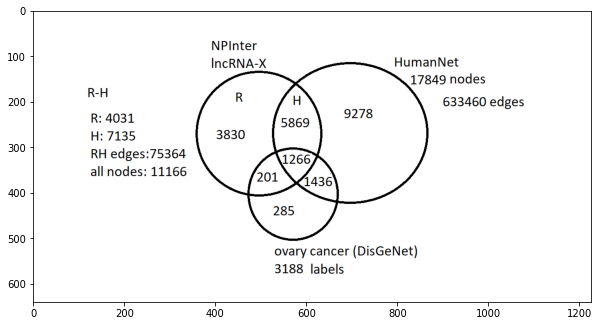

In [561]:
im = plt.imread("imgs/gene_overlaps_ovary.png");
plt.figure(figsize=(10,10))
plt.imshow(im); 

In [18]:
import pandas as pd
RHclean = pd.read_csv('data/NPInter_v4/processed/RHclean.csv')
cancer = pd.read_csv("data/DisGeNet/breast_cancer.csv")
cancergenes = set(list(cancer.EntrezID))
R = set(list(RHclean.ncEz))
H = set(list(RHclean.tarEz))
O = cancergenes
dfHN = pd.read_csv('data/HumanNet/HS-PI.tsv',delimiter='\t',header=None)
HN = set(list(dfHN[0])+list(dfHN[1]))

In [12]:
print(len(R.intersection(O)),len(H.intersection(O)), len(O)) 

360 2944 7520


In [15]:
RHclean[RHclean.ncEz.isin(R.intersection(O))]

Unnamed: 0       ncEz   tarEz
2             310     400500    2130
3             312     400500   79753
4             513        618    1973
6             547  100506428     367
7             549  101805488    4609
...           ...        ...     ...
75359      536405     406952     331
75360      536409     406952   57826
75361      536417     406952    6134
75362      539035     406952  144699
75363      539037     407050  144699

[36407 rows x 3 columns]

In [19]:
RH = R.union(H)
print(len(O-R), len(O.intersection(R)))
print(len(O-H), len(O.intersection(H)))
print(len(O-RH), len(O.intersection(RH)))
print(len(O-HN), len(O.intersection(HN)))

7160 360
4576 2944
4216 3304
1074 6446


In [22]:
len(O.intersection(HN-H))

3502

In [24]:
print(len(O-HN.union(RH)))

714


In [25]:
714+360+2944+3502

7520

In [26]:
print(len(O))

7520


In [28]:
print(len(R-O),len(H-O),len(HN-H-O))

3671 4191 7212


In [31]:
2944+4192

7136

In [32]:
len(H)

7135

In [35]:
len(O.intersection(H))

2944

In [37]:
2944+4191

7135

In [38]:
2944/7135

0.4126138752627891

In [39]:
len(HN)

17849

In [40]:
len(RH)

11166

In [41]:
len(O)

7520

In [43]:
cancerlabels_dir={'ovarian':"data/DisGeNet/ovarian_cancer.csv",
                  'breast':"data/DisGeNet/breast_cancer.csv",
                  'lung':"data/DisGeNet/lung_cancer.csv",
                  'colon':"data/DisGeNet/colon_cancer.csv",
                  'prostate':"data/DisGeNet/prostate_cancer.csv",
                  'pancreatic':"data/DisGeNet/pancreatic_cancer.csv"
                 }
for cancertype in cancerlabels_dir.keys():
    cancer = pd.read_csv(cancerlabels_dir[cancertype])
    print(cancertype, len(cancer))

ovarian 3188
breast 7520
lung 4798
colon 3004
prostate 4833
pancreatic 3013
